In [93]:
import os
import re
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np 
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [94]:
files1 = {os.path.splitext(k)[0]: {} for k in os.listdir('data') if '.csv' in os.path.splitext(k)[1]}
files2 = {os.path.splitext(k)[0]: {} for k in os.listdir('data/FCandFRECS') if '.csv' in os.path.splitext(k)[1]}


for i,file in enumerate(os.listdir('data')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.csv' in ext:
        df = pd.read_csv(f'data/{file}')
        files1[name] = df

for i,file in enumerate(os.listdir('data/FCandFRECS')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.csv' in ext:
        df = pd.read_csv(f'data/FCandFRECS/{file}')
        files2[name] = df

print(files1.keys())
amps=np.array(files1['Amps']['amp'])
Xa=np.array(files1['Amps']['X'])
Ya=np.array(files1['Amps']['Y'])
f22=np.array(files1['22']['frecs'])
X22=np.array(files1['22']['X'])
Y22=np.array(files1['22']['Y'])


print(files2.keys())
f=np.array(files2['0']['frecs'])
X=[]
Y=[]
for i in range(10):
    X.append(np.array(files2['{}'.format(i)]['X']))
    Y.append(np.array(files2['{}'.format(i)]['Y']))

dict_keys(['14', '22', '25', '27', '28', '29', 'Amps', 'Error22'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])


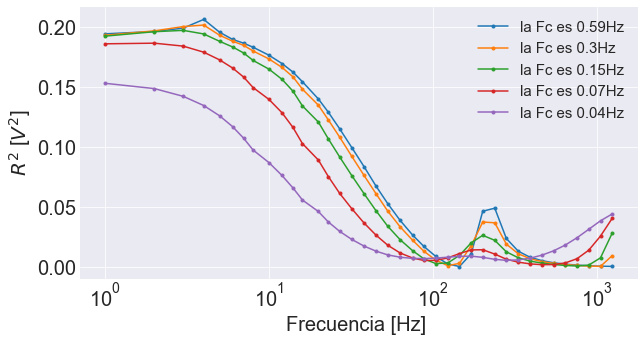

In [98]:
%matplotlib inline
plt.figure(figsize=(10,5))
for i in range(5):
    plt.semilogx(f,X[5+i]**2+Y[5+i]**2,'.-',label=f'la Fc es {np.round(fc(25+i),2)}Hz')
    
plt.ylabel(r'$R^2$ [$V^2$]',fontsize=20)
plt.xlabel(r'Frecuencia [Hz] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.legend(fontsize=15)


0.0001409833686238926
7.701076680532298e-05
0.00010926530890741082


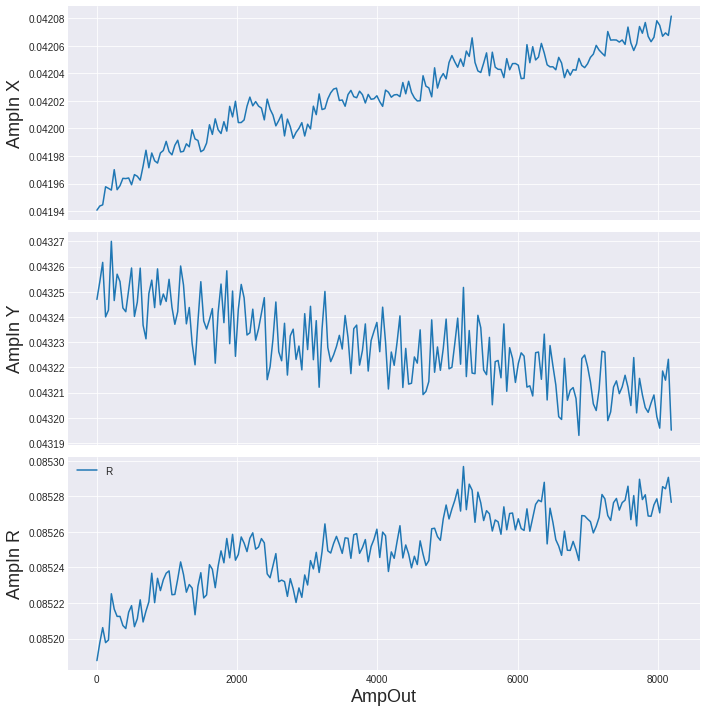

In [53]:
%matplotlib inline
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(10,10),sharex=True)
ax1.plot(amps,Xa**2,label='EEE')
ax2.plot(amps,Ya**2,label='Careta')
ax3.plot(amps,Xa**2+Ya**2,label='R')
ax1.set_ylabel('AmpIn X',fontsize=18)
ax2.set_ylabel('AmpIn Y',fontsize=18)
ax3.set_ylabel('AmpIn R',fontsize=18)
ax3.set_xlabel('AmpOut',fontsize=18)
fig.tight_layout()
plt.legend()
print(max(Xa**2)-min(Xa**2))
print(max(Ya**2)-min(Ya**2))
print(max(Xa**2+Ya**2)-min(Xa**2+Ya**2))

In [3]:
f22=np.array(files1['22']['frecs'])
X22=np.array(files1['22']['X'])
Y22=np.array(files1['22']['Y'])

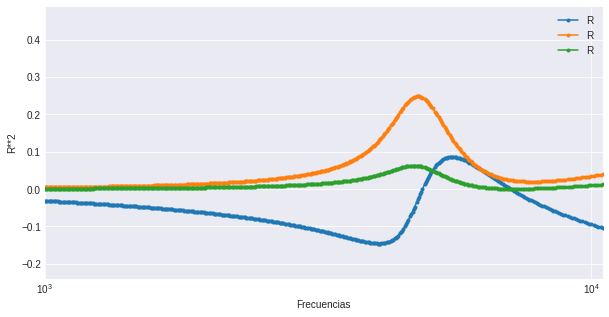

In [16]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.semilogx(1/( (f22+1) * 120 * 8e-9 ),Y22,'.-',label='R')
plt.semilogx(1/( (f22+1) * 120 * 8e-9 ),X22,'.-',label='R')
plt.semilogx(1/( (f22+1) * 120 * 8e-9 ),X22**2+Y22**2,'.-',label='R')
plt.xlabel('Frecuencias')
plt.ylabel('R**2')
plt.xlim(1000,10500)

plt.legend()

In [10]:
fe=np.array(files1['Error22']['frecs'])
Xe=np.array(files1['Error22']['X'])
Ye=np.array(files1['Error22']['Y'])
Re=np.array(files1['Error22']['R'])
ph=np.array(files1['Error22']['ph'])

In [20]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ) ,Re**2,'.-',label='R')
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ),Xe**2,'.-',label='X')
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ),Ye**2,'.-',label='Y')
plt.xlabel('Frecuencias')
plt.ylabel('V')
plt.legend()

In [10]:
plt.semilogx(1e9/(f*2520*8),X[2],'.-',label='{}'.format(20+2))

In [45]:
def hz(frec):
    hz_ = 1/( (frec+1) * 120 * 8*10**-9 )
    return hz_

def vars_(df):
    X = np.array(df['X']) #* 1000
    Y = np.array(df['Y']) #* 1000
    R = np.sqrt(X**2 + Y**2)
    T = np.arctan(Y/X)
    return X,Y,R,T

def fc(frec):
    hz_ =  1/(2 * np.pi * (2 ** frec ) * 8 )*10**9
    return hz_

files1.keys()





dict_keys(['14', '22', '25', '27', '28', '29', 'Amps', 'Error22'])

In [49]:
a = [1,2,3]
b = [1,2,3]
c = [1,2,3]
d = []
d.append(a)
d.append(b)
d.append(c)
print(np.mean(d))

2.0


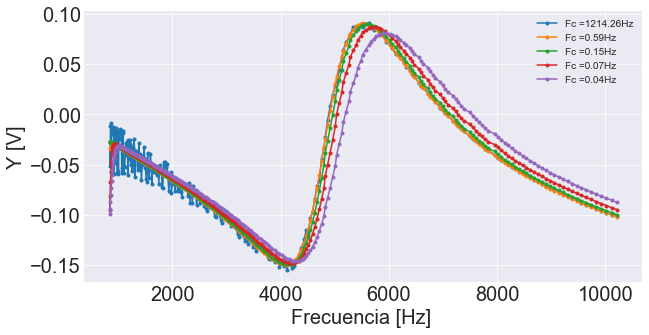

In [86]:

%matplotlib inline
plt.figure(figsize=(10,5))

files = ['14', '25', '27', '28', '29']
ys = []
for file in files:
    x,y,r,t = vars_(files1[file]) 
    frec = hz(files1[file]['frecs'])
    if file != '14':
        ys.append(y)
    #r = r[0:len(r)-50]
    #frec = frec[0:len(frec)-50]

    plt.plot(frec,r**2,'.-',label=f'Fc = {file} o {np.round(fc(int(file)),2)}Hz')
    #plt.plot(frec,y,'.-',label=f'Fc ={np.round(fc(int(file)),2)}Hz')
    plt.ylabel(r'$R^2 [V^2]$',fontsize=20)
    plt.xlabel(r'Frecuencia [Hz] ',fontsize=20)
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)
    plt.legend(fontsize=10)
    #plt.title(f"Circuito RLC",fontsize=20)
#plt.xlim([150,500])
plt.ylim([0,0.07])


Text(0.5, 1.0, 'Media de las Y calculadas con las distintas Fc')

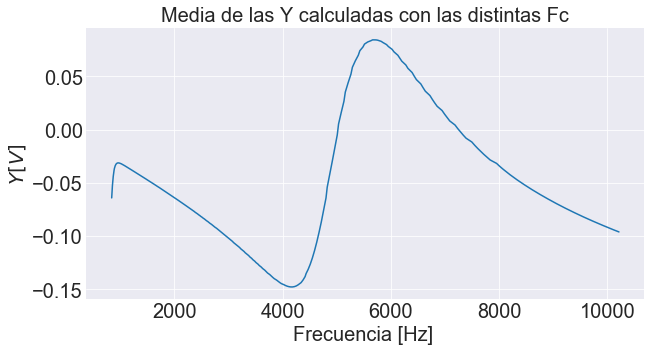

In [89]:
yst = np.transpose(np.array(ys)) 
y_mean = []
for y in yst:
    y_m = np.mean(y)
    y_mean.append(y_m)

%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(frec,y_mean)
plt.ylabel(r'$Y [V]$',fontsize=20)
plt.xlabel(r'Frecuencia [Hz] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.legend(fontsize=10)
plt.title(f"Media de las Y calculadas con las distintas Fc",fontsize=20)
#peaks = plt.ginput(2)    
    

In [92]:
a = peaks[0][0]
b = peaks[1][0]
b-a

1601.1364079614523

In [77]:
44721.3595499958/(2*np.pi) - 31622.7766016838/(2*np.pi)

2084.704223723067

Covariance of coefficients:
[[ 3.12188452e-07 -1.28655586e-01  9.63174790e+02  3.09108153e+02]
 [-1.28655586e-01  5.30200900e+04 -3.96932739e+08 -1.27386168e+08]
 [ 9.63174790e+02 -3.96932739e+08  2.97162074e+12  9.53671344e+11]
 [ 3.09108153e+02 -1.27386168e+08  9.53671344e+11  3.06058247e+11]]
C0: 4.937194072564386e-08
L: 0.020354502246402766
R: -152.3829234982576
R2: -48.903721510617046


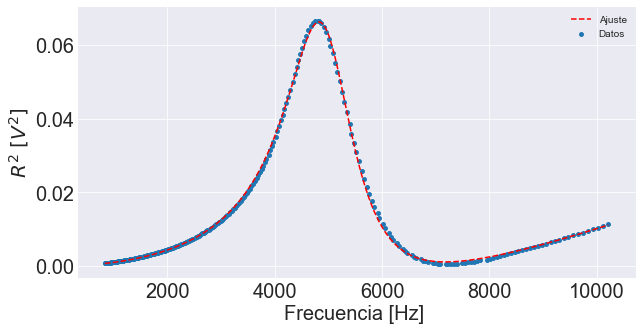

31544.936483828216


In [91]:

from scipy.optimize import curve_fit
x,y,r,t = vars_(files1['27']) 
frec = hz(files1[file]['frecs'])
#r = r[0:len(r)-50]
#frec = frec[0:len(frec)-50]

def transf(frec,C0,L,R,R2):
    w = frec * np.pi * 2
    A = C0**2*R2**2*w**2*(C0**2*L**2*w**4 + C0**2*R**2*w**2 - 4*C0*L*w**2 + 4)
    B = (C0**4*L**2*R2**2*w**6 + C0**4*R**2*R2**2*w**4 - 4*C0**3*L*R2**2*w**4 + C0**2*L**2*w**4 + C0**2*R**2*w**2 + 2*C0**2*R*R2*w**2 + 4*C0**2*R2**2*w**2 - 2*C0*L*w**2 + 1)
    func = A/B
    return func


L=10 * 10**-3
C0= 100 *10**-9 
R = 12
R2 = 50

param, param_cov = curve_fit(transf,frec,r**2, p0=[C0,L,R,R2]) 
  
print("Covariance of coefficients:") 
print(param_cov) 
print(f'C0: {param[0]}')
print(f'L: {param[1]}')
print(f'R: {param[2]}')
print(f'R2: {param[3]}')


plt.figure(figsize=(10,5))
plt.plot(frec,transf(frec,param[0],param[1],param[2],param[3]), '--', label ="Ajuste",color='red') 
plt.scatter(frec,(r)**2, s= 15, label ="Datos")
#plt.scatter(frec,transf(frec), s= 15, label ="Datos")
plt.ylabel(r'$R^2$ $[V^2]$',fontsize=20)
plt.xlabel(r'Frecuencia [Hz] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.legend(fontsize=10)
plt.legend()
plt.show()
print(1/np.sqrt(param[0]*param[1]))

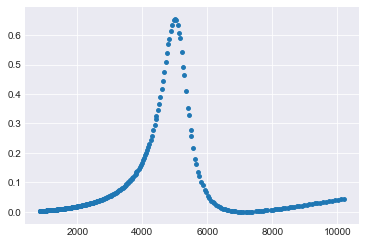

In [34]:
def transf(frec):
    R = 12
    R2 = 50
    L=10 * 10**-3
    C0= 100 *10**-9
    w = frec * np.pi * 2
    A = C0**2*R2**2*w**2*(C0**2*L**2*w**4 + C0**2*R**2*w**2 - 4*C0*L*w**2 + 4)
    B = (C0**4*L**2*R2**2*w**6 + C0**4*R**2*R2**2*w**4 - 4*C0**3*L*R2**2*w**4 + C0**2*L**2*w**4 + C0**2*R**2*w**2 + 2*C0**2*R*R2*w**2 + 4*C0**2*R2**2*w**2 - 2*C0*L*w**2 + 1)
    func = A/B
    return func

plt.scatter(frec,transf(frec), s= 15, label ="Datos")

In [31]:
frec

0      1238
1      1228
2      1218
3      1208
4      1197
5      1187
6      1177
7      1168
8      1158
9      1148
10     1138
11     1129
12     1119
13     1110
14     1101
15     1092
16     1082
17     1073
18     1064
19     1055
20     1047
21     1038
22     1029
23     1020
24     1012
25     1003
26      995
27      987
28      978
29      970
       ... 
267     130
268     129
269     128
270     127
271     126
272     125
273     124
274     123
275     122
276     121
277     120
278     119
279     118
280     117
281     116
282     115
283     114
284     113
285     112
286     111
287     110
288     109
289     108
290     107
291     106
292     105
293     104
294     103
295     102
296     101
Name: frecs, Length: 297, dtype: int64